<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/kernel_pca_on_X_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**


> *1.3 Write a piece of code to implement the Kernel PCA algorithm on this dataset. Use the following kernels :*



> *a.   K(X,Y)=(1+Xᵀ Y)ᵈ for d={2,3,4}*


> *b.   K(X,Y) = exp (−(X−Y)\^ᵀ (X−Y))/2σ\^2 for σ = {0.1,0.2,...,1}*


> *Plot the projection of each point in the dataset onto the top-2 components for each kernel. Use one plot for each kernel and in the case of (B), use a different plot for each value of σ.*








**Importing libraries and Data downloding**

In [1]:
!python --version
import numpy as np
print("numpy version",np.version.version)
import matplotlib.pyplot as plt 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784) 
print("x_train matrix shape", x_train.shape)
print("x_test matrix shape", x_test.shape)
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)
print("np_x_train shape", np_x_train.shape)
print("np_x_train[0] datatype", np_x_train[0].dtype)
np_x_train = np_x_train.astype(np.float64)
np_x_test = np_x_test.astype(np.float64)
print("np_x_train[0] datatype", np_x_train[0].dtype)

Python 3.8.10
numpy version 1.22.4
11490434/11490434 [==============================] - 0s 0us/step
x_train matrix shape (60000, 784)
x_test matrix shape (10000, 784)
np_x_train shape (60000, 784)
np_x_train[0] datatype uint8
np_x_train[0] datatype float64




> In actual Kernel PCA algorithm we have to calculate the matrix multiplication of 𝐗𝐗ᵀ, but due to computational constarins on google colab we will be using X-Test data to do the same thing here where we will be using 𝐗𝐗ᵀ as covariance matrix to do all the further computations. 



In [ ]:
transposearray=np.transpose(np_x_test)
print("np_x_test matrix shape",np_x_test.shape)
print("transposearray matrix shape",transposearray.shape)
k=np.matmul(np_x_test,transposearray)
print("multiplied  matrix shape",k.shape)

np_x_test matrix shape (10000, 784)
transposearray matrix shape (784, 10000)
multiplied  matrix shape (10000, 10000)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  κ(x,y)=(1+xTy)d for d= 2



In [ ]:
for i in range(10000):
    for j in range(10000):
        k[i][j]+=1
for i in range(10000):
    for j in range(10000):
        k[i][j]=k[i][j]*k[i][j]
I=np.identity(10000) 
print("Identity matrix shape",I.shape)
div=1/10000
divmat=np.full((10000,10000), div)
print("divmat matrix shape",divmat.shape)
matminus = np.subtract(I, divmat) 
print("matminus matrix shape",matminus.shape)
f=np.matmul(matminus, k)
print("f matrix shape",f.shape)
kernalcent=np.matmul(f, matminus)
print("kernalcent matrix shape",kernalcent.shape)

Identity matrix shape (10000, 10000)
divmat matrix shape (10000, 10000)
matminus matrix shape (10000, 10000)
f matrix shape (10000, 10000)
kernalcent matrix shape (10000, 10000)




> Computing eigen values and eigen vectors with numpy linalg.eig



In [ ]:
eig_vals, eig_vecs = np.linalg.eig(kernalcent)



> Printing eigen value vector shape, eigen vector shape and 20 top eigen values of Kernel PCA 



In [ ]:
print("eigen vector shape",eig_vecs.shape)
print("eigenvalues  vector shape",eig_vals.shape)
for i in range (20):
  print(f"{i+1} th eigen value is - {np.real(eig_vals[i])}")

eigen vector shape (10000, 10000)
eigenvalues  vector shape (10000,)
1 th eigen value is - 2.937058367810468e+16
2 th eigen value is - 1.5878772826169484e+16
3 th eigen value is - 1.456836255270512e+16
4 th eigen value is - 1.2973999479500286e+16
5 th eigen value is - 1.2226869158107738e+16
6 th eigen value is - 9146911596731142.0
7 th eigen value is - 7005641874852077.0
8 th eigen value is - 6677522052940821.0
9 th eigen value is - 5812567974517031.0
10 th eigen value is - 5067498600964866.0
11 th eigen value is - 4648686647219761.0
12 th eigen value is - 4525274083637087.0
13 th eigen value is - 3792124562296915.0
14 th eigen value is - 3552264234891776.0
15 th eigen value is - 3427330216660478.5
16 th eigen value is - 3277769220322865.5
17 th eigen value is - 2991361055725251.5
18 th eigen value is - 2823995380103566.0
19 th eigen value is - 2673482797658120.5
20 th eigen value is - 2572269467535199.5


In [ ]:
variance = 0
for i in range (10000):
  variance = ( variance + np.real(eig_vals[i]))
print("Total variance equal to  ",variance)
var95 = 0
dimension = 0
for i in range (10000):
  var95 = (var95 + np.real(eig_vals[i]))
  if(var95 >= (0.95 * variance)):
    dimension = i
    break;
print("95% variance is equal to  ",var95)
print("chaecking ratio of var95/total variance  ",var95/variance)
print("number of dimensions requred to capture 95% variance  ",dimension)
a = 0
a = a + np.real(eig_vals[0])
a = a + np.real(eig_vals[1])
print("Top 2 directions cumulative variance is equal to  ",a)
print("Top 2 directions cumulative % variance is equal to  ",100*(a/variance))

Total variance equal to   3.1194120406633446e+17
95% variance is equal to   2.9635319843875674e+17
chaecking ratio of var95/total variance   0.9500290265460958
number of dimensions requred to capture 95% variance   1766
Top 2 directions cumulative variance is equal to   4.524935650427416e+16
Top 2 directions cumulative % variance is equal to   14.505732463176574




> Ploting the projection of each point in the dataset onto the top-2 components for kernel.



In [ ]:
eig_vecs = eig_vecs.transpose()
eigenval1=eig_vals[0]
eigenval2=eig_vals[1]
eigenvec1=eig_vecs[0]
eigenvec2=eig_vecs[1]
import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)
c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)
print("c1 matrix shape",c1.shape)
print("c2 matrix shape",c2.shape)

c1 matrix shape (10000,)
c2 matrix shape (10000,)


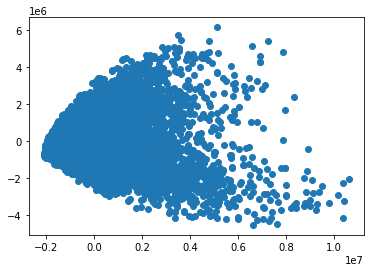

In [ ]:
plt.scatter(c1,c2)



> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y)=(1+Xᵀ Y)ᵈ for d= 3 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



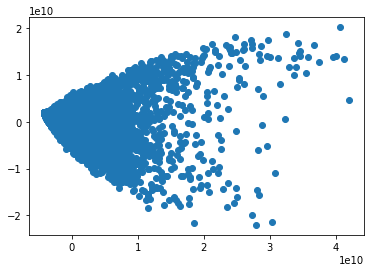

In [ ]:
transposearray=np.transpose(np_x_test)
k=np.matmul(np_x_test, transposearray)
for i in range(10000):
    for j in range(10000):
        k[i][j]+=1 
for i in range(10000):
    for j in range(10000):
        k[i][j]=k[i][j]*k[i][j]*k[i][j]
I=np.identity(10000) 
div=1/10000
divmat=np.full((10000,10000), div)
matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()
maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)
c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

plt.scatter(c1,c2)



> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y)=(1+Xᵀ Y)ᵈ for d= 4 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



In [ ]:
transposearray=np.transpose(np_x_test)
k=np.matmul(np_x_test, transposearray)
for i in range(10000):
    for j in range(10000):
        k[i][j]+=1 
for i in range(10000):
    for j in range(10000):
        k[i][j]=k[i][j]*k[i][j]*k[i][j]*k[i][j]
I=np.identity(10000) 
div=1/10000
divmat=np.full((10000,10000), div)
matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()
maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]

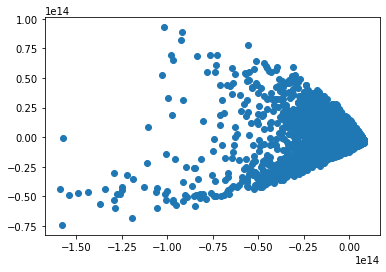

In [3]:
import math
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)
c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

plt.scatter(c1,c2)



> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function    K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2 for σ = 0.1 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



<ipython-input-16-898bdf709e6a>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-16-898bdf709e6a>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)
/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


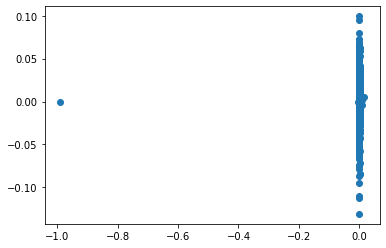

In [ ]:
array = np_x_test
tempmat=np.zeros([10000,10000])
sigma=0.1
div = sigma**2
div *= -2

for i in range(10000):
    for j in range(10000):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(10000)
div=1/10000
divmat=np.full((10000,10000), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)


plt.scatter(c1,c2)




> Again implementing Kernel PCA algorithm for less data points and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.1 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



> Now using less number of data as computation for whole x_test data set taking more time. For one set of calculation it's taking O(10000)^3 order computations as d^3 calculations for eigen vector and eigen value calculations, so we will be using like 300 or 100 data points for furthur repeetative calculations.



ploting for sigma equal to  0.1


<ipython-input-15-5c34bf7fcad3>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-15-5c34bf7fcad3>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


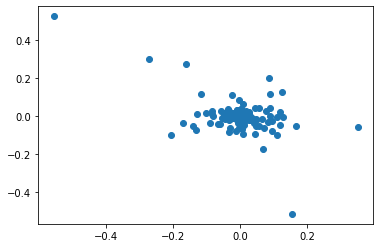

In [ ]:
array = np.empty((300,784),dtype=np.float64)
for i in range (300):
  array[i] = np_x_test[i]
tempmat=np.zeros([300,300])
sigma=0.1
div = sigma**2
div *= -2

for i in range(300):
    for j in range(300):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(300)
div=1/300
divmat=np.full((300,300), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.2 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.2


<ipython-input-14-e8a0777a747d>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-14-e8a0777a747d>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


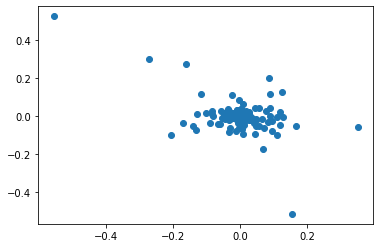

In [ ]:
array = np.empty((300,784),dtype=np.float64)
for i in range (300):
  array[i] = np_x_test[i]
tempmat=np.zeros([300,300])
sigma=0.2
div = sigma**2
div *= -2

for i in range(300):
    for j in range(300):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(300)
div=1/300
divmat=np.full((300,300), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.3 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.3


<ipython-input-13-aa1fa125d792>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-13-aa1fa125d792>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)
/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


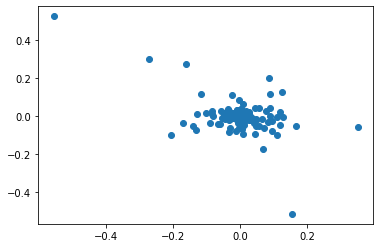

In [ ]:
array = np.empty((300,784),dtype=np.float64)
for i in range (300):
  array[i] = np_x_train[i]
tempmat=np.zeros([300,300])
sigma=0.3
div = sigma**2
div *= -2

for i in range(300):
    for j in range(300):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(300)
div=1/300
divmat=np.full((300,300), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.4 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.4


<ipython-input-16-40ee5b38d84c>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-16-40ee5b38d84c>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


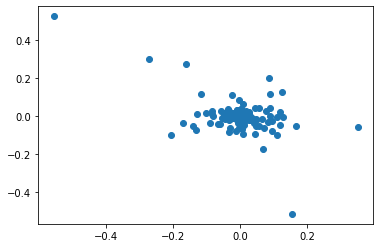

In [ ]:
array = np.empty((300,784),dtype=np.float64)
for i in range (300):
  array[i] = np_x_train[i]
tempmat=np.zeros([300,300])
sigma=0.4
div = sigma**2
div *= -2

for i in range(300):
    for j in range(300):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(300)
div=1/300
divmat=np.full((300,300), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.5 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.5


<ipython-input-17-1dbec59fab9d>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-17-1dbec59fab9d>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


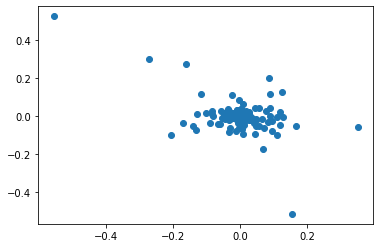

In [ ]:
array = np.empty((300,784),dtype=np.float64)
for i in range (300):
  array[i] = np_x_train[i]
tempmat=np.zeros([300,300])
sigma=0.5
div = sigma**2
div *= -2

for i in range(300):
    for j in range(300):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(300)
div=1/300
divmat=np.full((300,300), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.6 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.6


<ipython-input-18-259e5a8d66dd>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-18-259e5a8d66dd>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


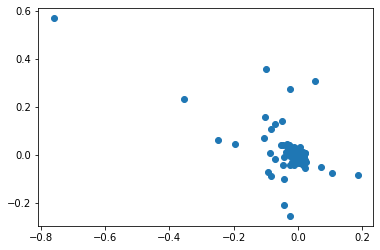

In [ ]:
array = np.empty((600,784),dtype=np.float64)
for i in range (600):
  array[i] = np_x_train[i]
tempmat=np.zeros([600,600])
sigma=0.6
div = sigma**2
div *= -2

for i in range(600):
    for j in range(600):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(600)
div=1/600
divmat=np.full((600,600), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.7 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.7


<ipython-input-20-dd7cc344b70a>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  e1=math.sqrt(eigenval1)
<ipython-input-20-dd7cc344b70a>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  e2=math.sqrt(eigenval2)


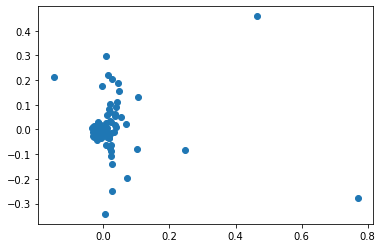

In [ ]:
array = np.empty((200,784),dtype=np.float64)
for i in range (200):
  array[i] = np_x_train[i]
tempmat=np.zeros([200,200])
sigma=0.7
div = sigma**2
div *= -2

for i in range(200):
    for j in range(200):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(200)
div=1/200
divmat=np.full((200,200), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.8 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.8


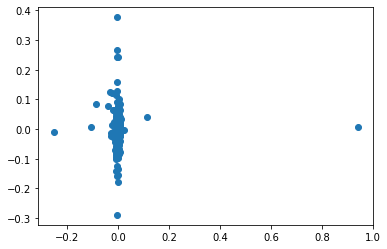

In [ ]:
array = np.empty((800,784),dtype=np.float64)
for i in range (800):
  array[i] = np_x_train[i]
tempmat=np.zeros([800,800])
sigma=0.8
div = sigma**2
div *= -2

for i in range(800):
    for j in range(800):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(800)
div=1/800
divmat=np.full((800,800), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 0.9 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  0.9


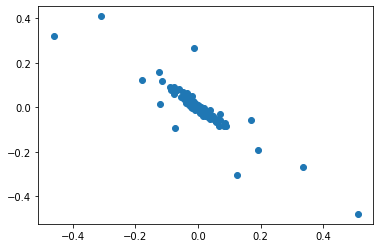

In [ ]:
array = np.empty((150,784),dtype=np.float64)
for i in range (150):
  array[i] = np_x_train[i]
tempmat=np.zeros([150,150])
sigma=0.9
div = sigma**2
div *= -2

for i in range(150):
    for j in range(150):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(150)
div=1/150
divmat=np.full((150,150), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix for kernel function  K(X,Y) = exp (−(X−Y)ᵀ (X−Y))/2σ\^2  for σ = 1.0 and Ploting the projection of each point in the dataset onto the top-2 components for kernel.



ploting for sigma equal to  1


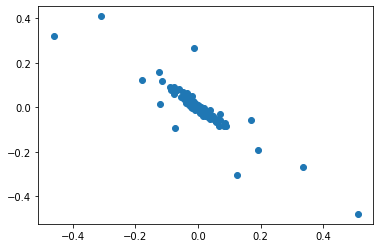

In [ ]:
array = np.empty((150,784),dtype=np.float64)
for i in range (150):
  array[i] = np_x_train[i]
tempmat=np.zeros([150,150])
sigma=1
div = sigma**2
div *= -2

for i in range(150):
    for j in range(150):
        x = array[i]
        y = array[j]
        sub = np.subtract(x,y)
        var = np.matmul(sub, sub.transpose())
        var = var / (2*sigma*sigma)
        var = np.exp(-1*var)
        tempmat[i][j] = var
x = array[2]
y = array[3]
sub = np.subtract(x,y)
var = np.matmul(sub, sub.transpose())
var = var / (2*sigma*sigma)
var = np.exp(-1*var)

k = tempmat
I=np.identity(150)
div=1/150
divmat=np.full((150,150), div)
divmat


matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_vecs = eig_vecs.transpose()

maxindex=np.argmax(eig_vals)
eigenval1=eig_vals[maxindex]
eigenvec1=eig_vecs[maxindex]
eig_vals=np.delete(eig_vals,maxindex,axis=0)
eig_vecs=np.delete(eig_vecs,maxindex,axis=0)
maxindex=np.argmax(eig_vals)
eigenval2=eig_vals[maxindex]
eigenvec2=eig_vecs[maxindex]


import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)


c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

print("ploting for sigma equal to ",sigma)
plt.scatter(c1,c2)




> Among all the kernel of K(X,Y)=(1+Xᵀ Y)ᵈ for d={2,3,4} for d==4 we are getting maximum variance plot between top-2 eigen vector projections. Unfortunatlly we are not able to calculate actual kernel matrix as dimensions will be (60000 X 60000) but again with (10000 X 10000) we are consuming too much time for a single calculations, more than 25min taking for a single batch computations. So we reduced the batch size for computations. Hence it will not be correct to compair the results coming for different batch size so while compairing we are not considering K(X,Y) = exp (−(X−Y)\^ᵀ (X−Y))/2σ\^2 for σ = {0.1,0.2,...,1} kernel functions.

